# MLPClassifier_FINAL

In this notebook, we try predicting humor based on the MLPClassifier, aided by stemming and stop word removal.


Results:
----
0.8242 accuracy, precision score is  0.8337440208725903 and recall is 0.8628431421571079


General Imports

In [2]:
from sklearn.neural_network import MLPClassifier 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import nltk
import re, string

In [3]:

#when running for the first time you need to activate this line for once.
#nltk.download('stopwords')

#Data Preprocessing, turn the "humor" column into boolean 
df = pd.read_csv("dataset.csv")
le = LabelEncoder()
df["humor"] = le.fit_transform(df["humor"])

Encoding the first column with int values instead of boolean and a function to remove stop words and stem the strings that pass in

In [4]:

#Data Preprocessing, turn the "humor" column into boolean 
df = pd.read_csv("dataset.csv")
le = LabelEncoder()
df["humor"] = le.fit_transform(df["humor"])


#definition of stemming function
token_pattern = re.compile(r"(?u)\b\w\w+\b") # split on whitespace

def tokenize(text):
    my_stopwords = set(stopwords.words('english'))
    stemmer = PorterStemmer()
    stems = []
    
    tokens = token_pattern.findall(text)
    for item in tokens:
        if item not in my_stopwords:
            stems.append(stemmer.stem(item))
    return stems

Turning the stemmed text data into a TF-IDF Vector

In [5]:
stem_vectorizer = TfidfVectorizer(tokenizer=tokenize, min_df=0.0015)
matrix = stem_vectorizer.fit_transform(df['text'])

df_data_stemmed = pd.DataFrame(matrix.toarray(), columns=stem_vectorizer.get_feature_names_out())
display(df_data_stemmed)

,000,10,100,11,12,13,14,15,20,2012,...,would,write,wrong,ye,year,yesterday,yet,yo,york,young
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
199996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
199997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
199998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Splitting training and testing data

In [6]:
df_data_train, df_data_test, df_target_train, df_target_test = train_test_split(
    df_data_stemmed, df["humor"], test_size=0.2, random_state=42)

A method to calculate the accuracy based on the confusion matrix

In [7]:
def accuracy(confusion_matrix):
   diagonal_sum = confusion_matrix.trace()
   sum_of_all_elements = confusion_matrix.sum()
   return diagonal_sum / sum_of_all_elements

Running the classifier, fitting the model and measuring accuracy

[[16560  3441]
 [ 2743 17256]]
Accuracy of MLPClassifier : 
0.8454


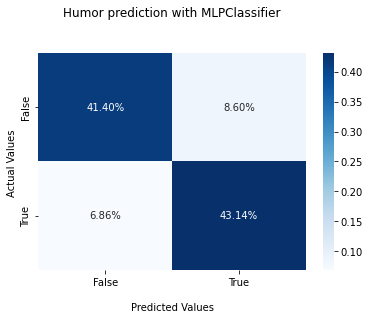

In [8]:
classifier = MLPClassifier(hidden_layer_sizes=(50,),activation = 'relu',solver='adam',random_state=1,learning_rate="constant",alpha=0.05)
classifier.fit(df_data_train, df_target_train)
y_pred = classifier.predict(df_data_test)

#Comparing the predictions against the actual observations in y_val
cm = confusion_matrix(df_target_test,y_pred)

#Printing the accuracy
print(cm)
print("Accuracy of MLPClassifier : ")
print(accuracy(cm))

ax = sns.heatmap(cm/np.sum(cm), annot=True, 
            fmt='.2%', cmap='Blues')

ax.set_title('Humor prediction with MLPClassifier\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
plt.show()

In [9]:
from sklearn.metrics import recall_score

ps = precision_score(df_target_test,y_pred)
rs = recall_score(df_target_test,y_pred)
print("The precision score is ",ps,"and recall is",rs)

The precision score is  0.8337440208725903 and recall is 0.8628431421571079
